In [1]:
# Install pyimagej if not already installed
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.feature import canny

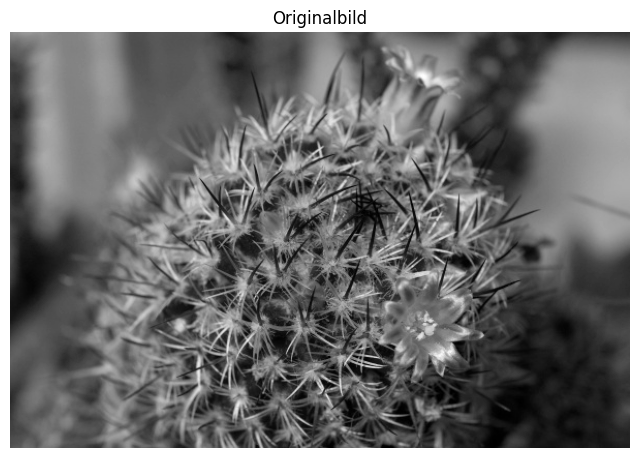

In [3]:

# Bild einlesen
image = io.imread('cactus.jpg', as_gray=True)

# Bild korrekt als Graustufen anzeigen
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')  # cmap='gray' für korrekte Graustufenanzeige
plt.title("Originalbild")
plt.axis('off')
plt.show()

In [16]:
def dilate(in_image, filter, iter_num=1):
    #assume that the hot spot of H is at its center (ic,jc) and filter is quadratic:
    ic = jc = (filter.shape[0] -1) / 2
        
    image = in_image.copy()

    for _ in range(iter_num):
        # Create an empty image for the result
        result = np.zeros_like(image)

        # For each pixel in the structuring element
        for j in range(filter.shape[0]):
            for i in range(filter.shape[1]):
                if filter[j, i] == 1:
                    # Shift the image by (i - ic, j - jc)
                    shifted = np.roll(image, shift=(j - jc, i - ic), axis=(0, 1))
                    # Combine using maximum (like Blitter.MAX)
                    result = np.maximum(result, shifted)

        image = result  # Update image for the next iteration
        
    return image

def erode(in_image, filter, iterations=1):
    """
    Erodiert das Bild durch Invertieren, Dilatieren und Rückinvertieren.
    Nur für binäre Bilder geeignet (0 und 1 oder 0 und 255).
    """
    # Invertiere das Bild (Vordergrund ↔ Hintergrund)
    inverted = 1 - in_image if in_image.max() <= 1 else 255 - in_image

    # Dilatiere das invertierte Bild
    dilated = dilate(inverted, filter, iterations)

    # Erneut invertieren → ergibt erodiertes Original
    eroded = 1 - dilated if dilated.max() <= 1 else 255 - dilated

    return eroded


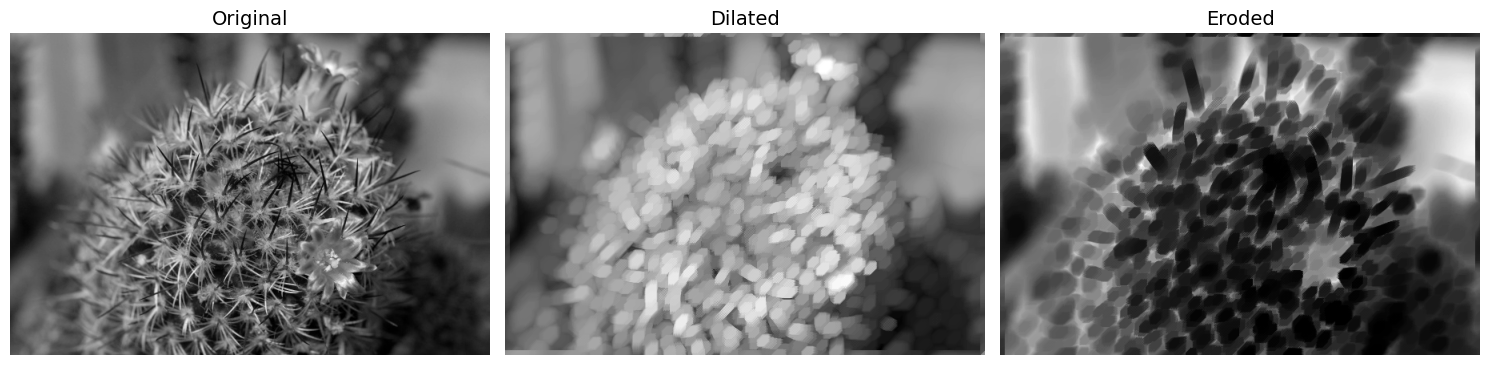

In [21]:
# Filter definieren (3x3 Kreuz)
filter_kernel = np.array([[0, 1, 0],
                          [1, 1, 1],
                          [0, 1, 0]], dtype=np.uint8)

filter_kernel2 = np.array([[0, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0],
                           [1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0],
                           [1, 0, 1, 0, 0],], dtype=np.uint8)


iter = 3

# Dilatation anwenden
dilated_image = dilate(image, filter_kernel2, iter)
eroded_image = erode(image, filter_kernel2, iter)

# Darstellung
plt.figure(figsize=(15, 5))

titles = ["Original", "Dilated", "Eroded"]
images = [image, dilated_image, eroded_image]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()